# Analisis Data Covid-19 -- PDA Studi Kasus Part 1

---

<table>
  <tr>
    <th><b> Asisten Praktikum </b></th>
    <th><b> Waktu Praktikum </b></th>
    <th><b> Kelas Praktikum </b></th>
  </tr>
  <tr>
    <td> Grace Sandi & Gustian Herlambang </td>
    <td> Selasa, 18.30-20.00 </td>
    <td> PDA Ekstensi </td>
  </tr>
  <tr>
    <td> Grace Sandi & Febry Liani </td>
    <td> Rabu, 14.30-16.00 </td>
    <td> PDA Gabung A </td>
  </tr>
  <tr>
    <td> M. Agung Ardiansyah & Runanto </td>
    <td> Kamis, 10.30-12.00 </td>
    <td> PDA Gabung B </td>
  </tr>
  <tr>
    <td> M. Agung Ardiansyah & Runanto </td>
    <td> Kamis, 16.00-17.30 </td>
    <td> PDA Gabung C </td>
  </tr>
  <tr>
    <td> Gustian Herlambang & Grace Sandi </td>
    <td> Sabtu, 13.00-14.30 </td>
    <td> PDA Gabung E </td>
  </tr>
</table>

<p align='justify'> <b>COVID-19</b> (<i>coronavirus disease</i> 2019) adalah penyakit yang disebabkan oleh jenis corona virus baru yaitu Sars-CoV-2, yang dilaporkan pertama kali di Wuhan Tiongkok pada tanggal 31 Desember 2019. Sampai saat ini masih ada laporan mengenai masyarakat yang terpapar Covid-19 di berbagai negera, termasuk Indonesia. Oleh karena itu, setiap laporan selalu di update dan menghasilkan data baru tiap harinya. (Copied from: [<b>PADK Kemkes</b>] (http://www.padk.kemkes.go.id/article/read/2020/04/23/21/hindari-lansia-dari-covid-19.html)) </p>

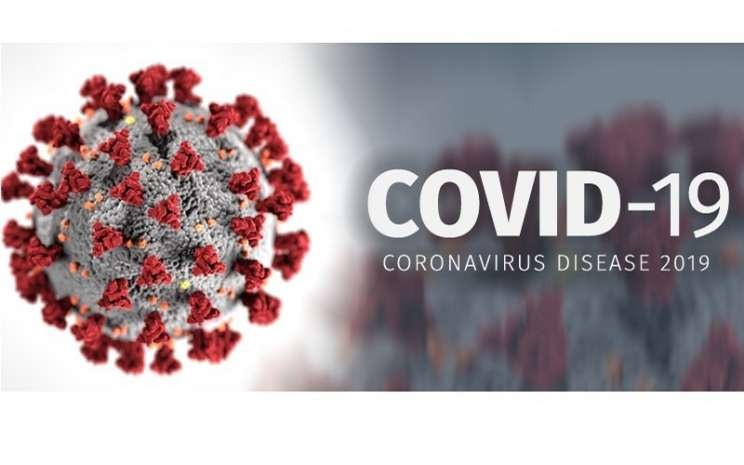

Source Picture: https://images.bisnis-cdn.com/thumb/posts/2020/07/21/1269076/covid-oke.jpg?w=744&h=465

<p align='justify'>Saat ini, dalam Studi Kasus Part 1 PDA akan menggunakan dataset Covid-19. Jenis dataset ini adalah <b>Time Series</b>, sehingga akan dilakukan analisis sesuai dengan dataset. Kemudian, setelah melihat hasil analisisnya maka akan dilihat korelasi antar Data yang terpapar Covid-19 dengan Data Worldwide Happiness.</p>

## Data Understanding | `Dataset COVID-19`

Sebelum jauh menganalisis dataset Covid-19 ini, diperlukan pemahaman atau pengenalan dataset agar memudahkan proses analisis kedepannya.

Telah dijelaskan sebelumnya bahwa dataset Covid-19 ini merupakan dataset berjenis Time Series. Sehingga dataset Covid-19 ini dapat berubah sesuai dengan up-date daripada laporan negara masing-masing.

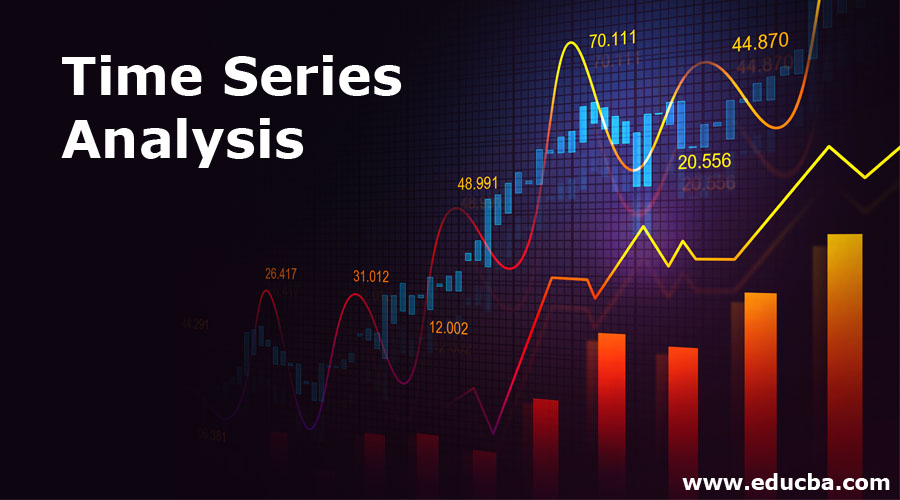

Source Picture: https://cdn.educba.com/academy/wp-content/uploads/2020/05/Time-Series-Analysis.jpg

*Data time series* adalah data yang disusun kemudian disimpan dalam urutan waktu atau data yang dikumpulkan dari waktu ke waktu. Waktu yang digunakan dapat berupa minggu, bulan, tahun dan lainnya.

Menurut Cornellius Y. Wijaya, dalam tulisannya di situs Medium, time series memiliki 4 bagian yang dibagi berdasarkan teknik untuk mendapatkan pola. Bagian itu ialah: 1) base atau level, 2) trend, 3) seasonality, dan 4) residual atau noise atau error.

> Variable / Atribut dalam dataset:
*   Province/State : Provinsi
*   Country/Region : Negara
*   Lat            : Latitude
*   Long           : Longitude
*   1/22/2020 s.d. 5/02/2021 : Time

> Tujuan Analisa Dataset Covid-19
*   Dapat menganalisis dataset berjenis Time Series dengan studi kasus data Covid-19
*   Mencari hubungan dataset Covid-19 dengan WorldWide Happiness 2020

## Exploratory Data Analysis

Oke, kita akan lanjut pada proses analisisnya dimulai dari Load Dataset. Kali ini, kita menggunakan 2 dataset.

**Link Dataset**

1.   Dataset Covid-19 : https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
2.   Dataset Worldwide Happiness : https://drive.google.com/file/d/1309J8IQ4mvQnHkzmLnpL6uqlVKuOiRmf/view?usp=sharing


Untuk dataset GitHub bisa langsung kita Load by Link GitHubnya. Dan dataset WorldWide Happiness akan kita Load dengan cara upload from storage device to Google Colab.



### Data Wrangling

Pertama tama mari kita import Library yang akan dibutuhkan dalam analisis dataset Covid-19. Silahkan teman-teman ketikan syntax berikut.

```
# Import Library yang dibutuhkan
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```



In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Selanjutnya kita akan Load Dataset Covid-19 ke Colab

```
# Load dataset dari Github
ConfirmedCases_raw = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
```



```
# Tampilkan dataset
ConfirmedCases_raw

```





In [ ]:
# Load dataset dari Github
ConfirmedCases_raw = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
# Tampilkan dataset
ConfirmedCases_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693,2705,2714,2733,2758,2772,2781,2785,2791,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132,270856,272767,274690,276407,278135,279753,280741,282270,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357,5446,5507,5582,5657,5715,5770,5812,5858,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86993,87318,87583,87583,87872,88012,88199,88418,8

Berikutnya kita akan coba untuk melakukan beberapa eksplorasi dasar

1.   Menampilkan shape dari dataset
2.   Melihat keseluruhan kolom

1. **Menampilkan shape dari dataset** <br>
Menggunakan fungsi shape, ini akan menampilkan total baris dan kolom dari data tersebut.

```
ConfirmedCases_raw.shape

```
Kita akan coba lihat seluruh kolomnya, kenapa tidak dengan baris? Karena baris merupakan isi dari datanya yang mana terdapat 275 baris berisi kasus terpaparnya masyarakat berdasarkan negara-negara yang ada dalam data. Sehingga, data itu akan kita analisis

In [ ]:
ConfirmedCases_raw.shape

(275, 471)

2. **Melihat keseluruhan kolom** <br>
Menggunakan fungsi columns untuk explore 469 kolom dalam dataset.

```
kolom_data = ConfirmedCases_raw.columns
kolom_data
```


In [ ]:
kolom_data = ConfirmedCases_raw.columns
kolom_data

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/23/21', '4/24/21', '4/25/21', '4/26/21', '4/27/21', '4/28/21',
       '4/29/21', '4/30/21', '5/1/21', '5/2/21'],
      dtype='object', length=471)

### Dropping Columns

Berdasarkan hasil, maka kita dapat melakukan drop 2 atribut, `Lat` dan `Long` yang mana tidak dibutuhkan dalam analisis kita. Mengapa? Karena kita sudah memiliki `Province/State` dan `Country/Region` yang lebih mudah dipahami dari pada membaca angka pada `Latitude` dan `Longitude`.

Maka dari itu kita akan melakukan `drop columns`.

```
ConfirmedCases_raw.drop(["Lat", "Long"], axis=1,
                        inplace = True
                        )
```

In [ ]:
ConfirmedCases_raw.drop(["Lat", "Long"], axis=1,
                        inplace = True
                        )

**Penjelasan:**


*   ConfirmedCases_raw.drop : kita akan menghapus dari variabel ConfirmedCases_raw menggunakan perintahh `drop`
*   (["Lat","Long"], : kita akan menghapus kolom yaitu `Lat` dan juga `Long`
*   axis=1, : kita akan menghapus keseluruhan kolom
*   inplace = True) : Setelah `Lat` dan `Long` dihapus kita akan mengubah ConfirmedCases_raw juga





### Agregasi Data

Sebelum kita coba mencari variable apa saja yang mempengaruhi dalam menentukan apakah masing-masing atribut memiliki hubungan / tidak, berikutnya kita akan melakukan agregasi data menggunakan fungsi `groupby()` untuk *outlining* kolom data berdasarkan **Country/Region**.

```
data_agregasi = ConfirmedCases_raw.groupby("Country/Region").sum()
```





In [ ]:
data_agregasi = ConfirmedCases_raw.groupby("Country/Region").sum()

Coba kita lihat data 5 teratasnya setelah di **Agregasi**

```
data_agregasi.head()
```



In [ ]:
data_agregasi.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993


Coba kita lihat, ada perbedaan kan setelah di agregasi? Coba lihat di **Country/Region**, posisinya agak sedikit menurun dibawah **time**. Sehingga kita dapat outline dari masing-masing negara berdasarkan time yang ada.

Contoh: Kita bisa lihat masyarakat Afghanistan yang terpapar Covid-19 dimulai dari 1/22/20 sampai 5/2/21.
Dan seperti itu cara melihat data selanjutnya sampai negara terakhir.

Dan coba lihat `shape` dari `data_agregasi`

```
data_agregasi.shape
```



In [ ]:
data_agregasi.shape

(192, 467)

Setelah dilakukan agregasi hasil yang kita dapatkan sekarang adalah 192 baris dan 467 kolom.

### Visualisasi Hasil Agregasi Dataset
Langkah berikutnya kita dapat melakukan visualisasi dari hasil agregasi dataset. Kita akan menampilkan negara kita yaitu Indonesia untuk kita ketahui seberapa banyak masyrakat Indonesia yang terpapar Covid-19.



```
data_agregasi.loc["Indonesia"]
```



In [ ]:
data_agregasi.loc["Indonesia"]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
4/28/21    1657035
4/29/21    1662868
4/30/21    1668368
5/1/21     1672880
5/2/21     1677274
Name: Indonesia, Length: 467, dtype: int64

**Penjelasan:**


*   data_agregasi : adalah dataset yang telah diagregasi di langkah sebelumnya
*   .loc["Indonesia"] : kita akan menampilkan data terpilih yaitu Indonesia dengan menghiraukan kolom indexnya dengan menggunakan fungsi `.loc`

Kemudian disimpan dalam array 1 dimensi / series seperti pada data yang sedang ditampilkan diatas.

Pada jumlah yang terpapar Covid-19 di Indonesia pada tanggal 22 Januari 2020 tidak ada yang terpapar. Sampai pada tanggal 2 Mei 2021 kemarin sudah 1.677.274 masyarakat Indonesia yang terpapar Covid-19.



Jika kita visualisasikan negara Indonesia dengan library Matplotlib
```
data_agregasi.loc['Indonesia'].plot()
```



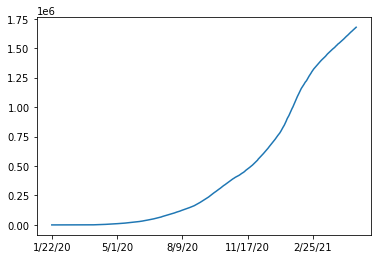

In [ ]:
data_agregasi.loc['Indonesia'].plot()

Maka kita mendapatkan hasil atau kesimpulan bahwa masyarakat Indonesia yang terpapar Covid-19 cenderung terus meningkat.

Coba kita bandingkan dengan negara-negara lainnya

```
data_agregasi.loc['Indonesia'].plot()
data_agregasi.loc['China'].plot()
data_agregasi.loc['Italy'].plot()
data_agregasi.loc['India'].plot()
data_agregasi.loc['US'].plot()
data_agregasi.loc['Malaysia'].plot()
plt.legend()
```



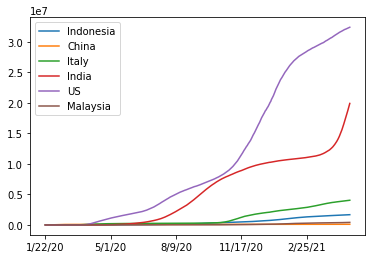

In [ ]:
data_agregasi.loc['Indonesia'].plot()
data_agregasi.loc['China'].plot()
data_agregasi.loc['Italy'].plot()
data_agregasi.loc['India'].plot()
data_agregasi.loc['US'].plot()
data_agregasi.loc['Malaysia'].plot()
plt.legend()

Setelah membandingkan dengan negara-negara lainnya antara Indonesia dengan China dan Malaysia, Indonesia masih meningkat untuk masyrakat yang terpapar Covid-19. Namun, kalau dibandingkan dengan negara Italia, India, dan US, Indonesia cenderung memiliki kondisi lebih baik dari ke-3 negara itu.

**Keterangan Warna Line Chart:**

*   Biru : Indonesia
*   Orange : China
*   Hijau : Italia
*   Merah : India
*   Ungu : US
*   Cokelat : Malaysia

Sekarang coba kita lihat 5 hari terakhir terhitung dari tanggal 2 Mei 2021, Indonesia semakin meningkat untuk yang terpapar.

```
data_agregasi.loc['Indonesia'][-5:].plot()
```



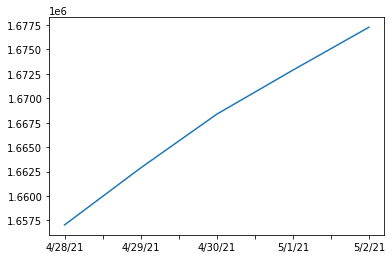

In [ ]:
data_agregasi.loc['Indonesia'][-5:].plot()

Visualisasi data Covid-19 di Indonesia dengan fungsi `.diff().plot()`

```
data_agregasi.loc["Indonesia"].diff().plot()
```

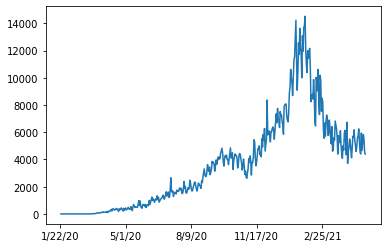

In [ ]:
data_agregasi.loc["Indonesia"].diff().plot()

**Penjelasan**
.diff().plot() : memvisualisasikan data dengan menunjukan kenaikan dan penurunan data tersebut

Kita juga bisa melihat berapa paling banyaknya yang terpapar Covid-19 dalam waktu 24 jam di beberapa negara. Kita coba bandingkan antara Indonesia dengan US dan China.

```
#Dalam 24 jam, masyarakat China sebanyak 15.136 orang terpapar Covid-19
data_agregasi.loc["China"].diff().max()

#Dalam 24 jam, masyarakat USA sebanyak 300.310 orang terpapar Covid-19
data_agregasi.loc["US"].diff().max()

#Dalam 24 jam, masyarakat Indonesia sebanyak 14.518 orang terpapar Covid-19
data_agregasi.loc["Indonesia"].diff().max()
```



In [ ]:
# Dalam 24 jam, masyarakat China sebanyak 15.136 orang terpapar Covid-19
data_agregasi.loc["China"].diff().max()

15136.0

In [ ]:
# Dalam 24 jam, masyarakat USA sebanyak 300.310 orang terpapar Covid-19
data_agregasi.loc["US"].diff().max()

300310.0

In [ ]:
# Dalam 24 jam, masyarakat Indonesia sebanyak 14.518 orang terpapar Covid-19
data_agregasi.loc["Indonesia"].diff().max()

14518.0

Dalam hal ini jika kita membayangkan hasil analisis data kita ini akan diserahkan / dipresentasikan ke Dinas Kesehatan maka Dinas Kesehatan Indonesia bisa lebih bergerak cepat dalam mengurangi penyebaran Covid-19 di Indonesia.

### Menyimpan hasil Agregasi pada Atribut Baru

Setelah kita mengetahui penyebaran dibeberapa negara di dunia, termasuk Indonesia. Sekarang kita akan menyimpan hasil data tersebut dan menjadikannya / menambahkannya 1 atribut baru.

```
negara = list(data_agregasi.index)
max_infection_rates = []
for c in negara :
    max_infection_rates.append(data_agregasi.loc[c].diff().max())
max_infection_rates


data_agregasi["max_infection_rates"] = max_infection_rates

data_agregasi.head()
```



In [ ]:
negara = list(data_agregasi.index)
max_infection_rates = []
for c in negara :
    max_infection_rates.append(data_agregasi.loc[c].diff().max())
max_infection_rates

[1485.0,
 1239.0,
 1133.0,
 299.0,
 355.0,
 82.0,
 29472.0,
 2476.0,
 716.0,
 9586.0,
 4451.0,
 310.0,
 1316.0,
 7626.0,
 207.0,
 1975.0,
 23921.0,
 1382.0,
 637.0,
 57.0,
 2866.0,
 3755.0,
 2356.0,
 100158.0,
 26.0,
 7560.0,
 315.0,
 2158.0,
 166.0,
 491.0,
 880.0,
 9668.0,
 16141.0,
 246.0,
 91.0,
 13990.0,
 15136.0,
 21078.0,
 234.0,
 649.0,
 547.0,
 3115.0,
 767.0,
 4620.0,
 1241.0,
 941.0,
 17773.0,
 4508.0,
 99.0,
 415.0,
 17.0,
 2370.0,
 11536.0,
 1774.0,
 998.0,
 1750.0,
 209.0,
 1956.0,
 1017.0,
 2372.0,
 12.0,
 863.0,
 117900.0,
 595.0,
 248.0,
 5450.0,
 49044.0,
 1583.0,
 4322.0,
 26.0,
 4233.0,
 315.0,
 156.0,
 214.0,
 284.0,
 7.0,
 2720.0,
 11265.0,
 106.0,
 401993.0,
 14518.0,
 25582.0,
 8696.0,
 8227.0,
 11934.0,
 40902.0,
 878.0,
 7914.0,
 9535.0,
 18757.0,
 2008.0,
 1237.0,
 4257.0,
 1716.0,
 11505.0,
 113.0,
 1861.0,
 6154.0,
 931.0,
 97.0,
 1639.0,
 62.0,
 3984.0,
 1967.0,
 7.0,
 1201.0,
 1316.0,
 5728.0,
 508.0,
 413.0,
 510.0,
 3.0,
 296.0,
 62.0,
 28115.0,
 1.0,
 

In [ ]:
data_agregasi["max_infection_rates"] = max_infection_rates

In [ ]:
data_agregasi.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,299.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,355.0


Maka kita sudah bisa melihat atribut baru yaitu `max_infection_rates` pada `data_agregasi`. Lalu hasil yang telah kita tambahkan dengan atribut 'max_infection_rates` akan disimpan dalam variabel baru supaya variabel ini nanti kita pakai dalam melihat korelasi dengan dataset WorldWide Happiness Record.

```
dataset_korona = pd.DataFrame(data_agregasi["max_infection_rates"])
dataset_korona.head()
```



In [ ]:
dataset_korona = pd.DataFrame(data_agregasi["max_infection_rates"])
dataset_korona.head()

,max_infection_rates
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


## Penjelasan

Kenapa kita menggunakan `max_infection_rates`? Karena atribut ini merupakan kumpulan dari hasil data Covid-19 yang telah kita analisis sebelumnya. Dan kita mengambilnya juga karena hasil dari `max_infection_rates` adalah data terbanyak masyarakat dari masing-masing negara yang terpapar Covid-19 dalam 24 jam. Sehingga memudahkan kita menganalis hubungannya. Apakah dalam waktu 24 jam (saat banyak yg terpapar Covid-19) itu memengaruhi WorldWide Happiness Result masing-masing negara tersebut? Mari! kita lihat.

## Data Understanding | Dataset WorldWide Happiness Report

Menurut Wikipedia, WorldWide Happiness Report merupakan publikasi dari PBB mengenai solusi PBB yaitu dalam Program Sustainable Development yang berisi artikel dan peringkat National Happiness berdasarkan penilaian responden tentang kehidupan mereka sendiri, laporan tersebut juga berkorelasi dengan berbagai faktor (kualitas) kehidupan. [Wikipedia](https://en.m.wikipedia.org/wiki/World_Happiness_Report).

Maka dari itu, kita akan mencoba bagaimana tingkat kebahagiaan di berbagai negara dengan mengaitkannya pada data Covid-19 diatas.

Oke kita mulai saja untuk Load Data terlebih dulu

```
from google.colab import files
uploaded_file = files.upload()
```



In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving WW_Happiness_2020.csv to WW_Happiness_2020.csv


Selanjutnya kita akan lihat dataset yang sudah kita upload dengan perintah



```
data_happiness = pd.read_csv(io.BytesIO(uploaded_file['WW_Happiness_2020.csv']))
data_happiness.head()
```

Disini kita menggunakan Happiness Report tahun 2020. Karena Covid-19 sendiri mulai banyak menyebar di tahun 2020.



In [ ]:
data_happiness = pd.read_csv(io.BytesIO(uploaded_file['WW_Happiness_2020.csv']))
data_happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


### Exploratory Data Analysis

Baiklah kita lakukan pengenalan terhadap dataset ini. Beberapa langkah diantaranya
1. Melihat informasi dataset
2. Menghapus beberapa atribut
3. Melihat shape dari kedua dataset
4. Melakukan merge pada atribut dataset

1. **Melihat informasi dataset** <br>
 Gunakan fungsi `info()` untuk melihat informasi pada dataset **happiness report** dengan memanggil variabel `data_happiness` yang menyimpan `DataFrame` kita.



```
data_happiness.info()
```



In [ ]:
data_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Terdapat 20 kolom dalam Happiness Report tetapi kita hanya menggunakan 5 kolom yaitu: <br>
1. **Country name** : Nama negara
2. **Logged GDG per capita** : Gross Domestic Product per kapita / Indikator penting kinerja ekonomi dan unit yang berguna untuk membuat perbandingan lintas negara antara standar hidup rata-rata dan kesejahteraan ekonomi
3. **Social support** : Informasi mengenai timbal balik / feedback terhadap orang lain
4. **Healty life expectancy** : Harapan hidup sehat
5. **Freedom to make life choices** : Kebebasan membuat pilihan hidup

Selain 5 atribut diatas akan kita drop.


Dataset from: [Kaggle](https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv)

2. **Menghapus beberapa atribut**

Kita akan menghapus kolom yang saat ini tidak kita pakai.

```
hapus_kolom = ["Regional indicator", "Ladder score", "Standard error of ladder score",
               "upperwhisker", "lowerwhisker", "Generosity",
               "Perceptions of corruption", "Ladder score in Dystopia",
               "Explained by: Log GDP per capita", "Explained by: Social support",
               "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices",
               "Explained by: Generosity", "Explained by: Perceptions of corruption",
               "Dystopia + residual"]
```


```
data_happiness.drop(hapus_kolom, axis=1, inplace=True)
data_happiness.head()
```





In [ ]:
hapus_kolom = ["Regional indicator", "Ladder score", "Standard error of ladder score",
               "upperwhisker", "lowerwhisker", "Generosity",
               "Perceptions of corruption", "Ladder score in Dystopia",
               "Explained by: Log GDP per capita", "Explained by: Social support",
               "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices",
               "Explained by: Generosity", "Explained by: Perceptions of corruption",
               "Dystopia + residual"]

In [ ]:
data_happiness.drop(hapus_kolom, axis=1, inplace=True)

In [ ]:

data_happiness.head()

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.639267,0.954330,71.900825,0.949172
1,Denmark,10.774001,0.955991,72.402504,0.951444
2,Switzerland,10.979933,0.942847,74.102448,0.921337
3,Iceland,10.772559,0.974670,73.000000,0.948892
4,Norway,11.087804,0.952487,73.200783,0.955750


**Penjelasan:** <br>



*   `hapus_kolom` : kita akan menampung atribut yang disebutkan dalam list kemudian disimpan dalam variabel `hapus_kolom`, untuk nantinya kita hapus beberapa atribut tersebut
*   `data_happiness.drop(hapus_kolom, axis=1, inplace=True)` : kita akan hapus atribut dalam `hapus_kolom`, dengan menghapus keseluruhan kolom menggunakan `axis=1`, setelah itu dataset akan berubah mengikuti hasil yang telah dihapus tadi dengan `inplace=True`
*   `data_happiness.head()` : lalu tampilkan 5 data teratas dengan `head`



3. **Melihat shape dari kedua dataset**


```
dataset_korona.head()
dataset_korona.shape
```

```
data_happiness.head()
data_happiness.shape
```



In [ ]:
dataset_korona.head()

,max_infection_rates
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [ ]:

dataset_korona.shape

(192, 1)

Dapat kita lihat `dataset_korona` memiliki 192 baris negara dengan 1 kolom yaitu `max_infection_rates`.

In [ ]:
data_happiness.head()

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.639267,0.954330,71.900825,0.949172
1,Denmark,10.774001,0.955991,72.402504,0.951444
2,Switzerland,10.979933,0.942847,74.102448,0.921337
3,Iceland,10.772559,0.974670,73.000000,0.948892
4,Norway,11.087804,0.952487,73.200783,0.955750


In [ ]:

data_happiness.shape

(153, 5)

Dapat juga kita lihat `data_happiness` memiliki 153 baris dan 5 kolom.

4. **Melakukan merge pada atribut dataset**
Selanjutnya kita melakukan `merge` antara `dataset_korona` dan `data_happiness` berdasarkan `Country` dengan perintah:

```
data_join = pd.merge(dataset_korona, data_happiness, left_on='Country/Region', right_on='Country name')
```

Kemudian hasil `merge` kita simpan dalam `data_join`.



In [ ]:
data_join = pd.merge(dataset_korona, data_happiness, left_on='Country/Region', right_on='Country name')

In [ ]:
data_join

,max_infection_rates,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1485.0,Afghanistan,7.462861,0.470367,52.590000,0.396573
1,1239.0,Albania,9.417931,0.671070,68.708138,0.781994
2,1133.0,Algeria,9.537965,0.803385,65.905174,0.466611
3,29472.0,Argentina,9.810955,0.900568,68.803802,0.831132
4,2476.0,Armenia,9.100476,0.757479,66.750656,0.712018
...,...,...,...,...,...,...
136,1786.0,Venezuela,8.977794,0.890408,66.505341,0.623278
137,110.0,Vietnam,8.809546,0.849987,67.952736,0.939593
138,174.0,Yemen,7.759683,0.817981,56.727283,0.599920
139,1796.0,Zambia,8.224720,0.698824,55.299377,0.806500


**Penjelasan:** <br>


*   `pd.merge(dataset_korona, data_happiness,` : kita akan merge kedua dataset yaitu `dataset_korona` & `data_happiness` dengan menggunakan library `Pandas`
*   `left_on='Country/Region', right_on='Country name')` : disini target yang akan di merge yaitu `Country` karena masing-masing dataset memiliki perbedaan nama atribut `Country` jadi kita bisa `merge` dengan perintah `left_on=Country/Region` (nama atribut Country pada dataset_korona. Dan `right_on='Country name` (nama atribut Country pada data_happiness).

Maka hasil dari `merge` kedua dataset terdiri dari 141 baris dan 6 kolom. Baris menjadi berkurang karena terdapat beberapa negara yang disalah satu dataset tidak ada sehingga tidak akan dimerge.

Sekarang coba kita lihat korelasi dari dataset yang sudah di `merge` dengan perintah `.corr()`


```
data_join.corr()
```




In [ ]:
data_join.corr()

,max_infection_rates,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.112450,0.012937,0.080182,-0.061432
Logged GDP per capita,0.112450,1.000000,0.788877,0.858725,0.440761
Social support,0.012937,0.788877,1.000000,0.764977,0.486838
Healthy life expectancy,0.080182,0.858725,0.764977,1.000000,0.478732
Freedom to make life choices,-0.061432,0.440761,0.486838,0.478732,1.000000


## Visualisasi Hasil Hubungan antara Dataset Covid-19 dengan Dataset WorldWide Happiness Report

Visualisasi ini menggunakan kedua dataset yang telah kita merge dan lihat korelasinya. Dengan visuaslisasi, lebih mudah untuk kita memahami data tersebut.

Visualisasi kali ini kita gunakan *scatter plot* dari `seaborn` jangan lupa untuk mengimportkan librarynya juga



```
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]
sns.scatterplot(x,y)
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


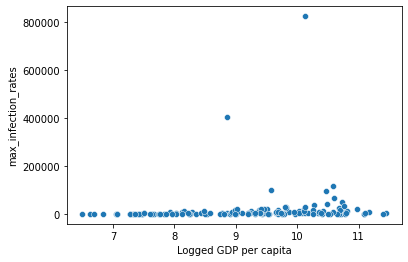

In [ ]:
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]
sns.scatterplot(x,y)

Ketika kita lihat pesebarannya, ternyata data kita menjadi tidak memiliki hubungan. Hampir semua scatter pada garis 0. Mari kita atasi dengan `log` dari `numpy`.




```
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]
sns.scatterplot(x,np.log(y))
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


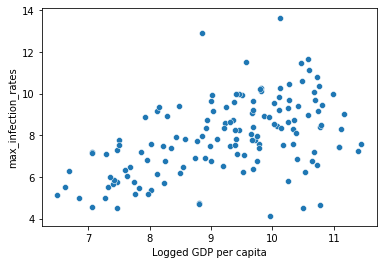

In [ ]:
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]
sns.scatterplot(x,np.log(y))

Sekarang data kita sudah baik, kenapa bisa? Visualisasi yang sebelumnya dengan `scatter` sebagian besar titik scatter berkumpul di wilayah kecil sumbu y dan pola yang kita lihat didominasi oleh *outliers* atau pencilan.

Cara yang lebih baik untuk membuat scatter plot adalah dengan mengubah **skala sumbu y** menjadi **skala log**. Untuk membuat sumbu y menjadi skala log, kita dapat membuat scatter plot dengan Seaborn dan menyimpannya ke variabel kemudian menggunakan fungsi set untuk menentukan yscale = log.

Sekarang coba kita visualisasikan dalam regresi linier dengan `sns.regplot`. SNS Regplot ini digunakan untuk memplot data dan mem-fit model dalam regresi linier.

Regplot merupakan salah satu fungsi utama di seaborn yang digunakan untuk memvisualisasikan hubungan linier yang ditentukan melalui regresi.

Regplot menerima berbagai jenis data masukkan, seperti array numpy sederhana, series, hingga data frame. Hanya dapat memvisualisasikan regresi linier.

Dalam pemanggilan yang paling sederhana, fungsi Regplot menggambar scatter plot dari dua variabel, x dan y, lalu menyesuaikan model regresi dan memplot garis regresi yang dihasilkan dengan interval kepercayaan 95% untuk regresi tersebut.



```
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))

```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


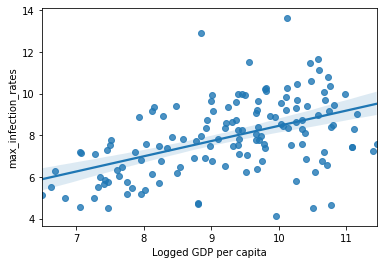

In [ ]:
x = data_join["Logged GDP per capita"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))

Kenapa Regresi Linier? Karena Regresi linear alat statistik yang dipergunakan untuk mengetahui pengaruh antara satu atau beberapa variabel terhadap satu buah variabel. Variabel yang memengaruhi sering disebut variabel bebas, variabel independen atau variabel penjelas.

**Lalu bagaimana membaca grafik regresi linier tersebut?** <br>
Cara membaca grafik diatas seperti ini:

*   Simbol • biru: adalah data asli hasil observasi
*   Garis biru menyerong: adalah hasil prediksi dari model Machine Learning ini, yang mana digaris itulah seharusnya banyak `max_infection_rates` terhadap `Logged GDP per capita` berada
<br>
contohnya : kita ambil  titik biru pada sumbu x, 8 `Logged Per Capita`. Menurut grafik, `Logged per capita` pada saat `max_infection_rates` ini sebesar 5 (kita misalkan 5). Tapi, menurut model Machine Learning, pada kondisi `max_infection_rates` seharusnya `Logged GDP per capita` nya sekitar 6 agar mencapai Kategori *Happiness*.

Dan seperti itu seterusnya untuk membaca model regresi linier untuk atribut lainnya dibawah.

Sebaran `Social support` dan `max infection_rates`


```
x = data_join["Social support"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))
```
Dan
Sebaran `Social support` dan `max infection_rates` dengan **regplot**

```
x = data_join["Social support"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))
```




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


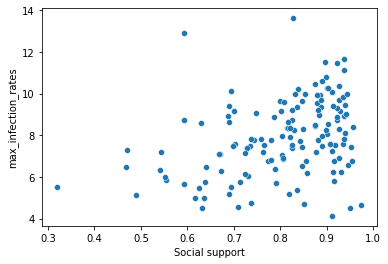

In [ ]:
x = data_join["Social support"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


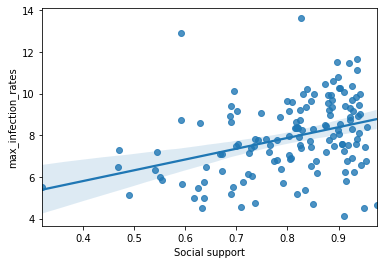

In [ ]:
x = data_join["Social support"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))

Sebaran `Healthy life expectancy` dan `max infection_rates`


```
x = data_join["Healthy life expectancy"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))
```
Dan
Sebaran `Healthy life expectancy` dan `max infection_rates` dengan **regplot**

```
x = data_join["Healthy life expectancy"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))
```




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


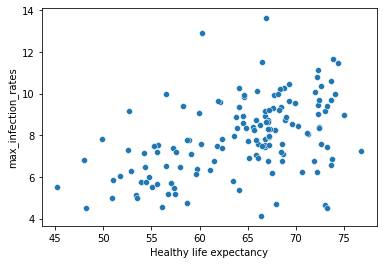

In [ ]:
x = data_join["Healthy life expectancy"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


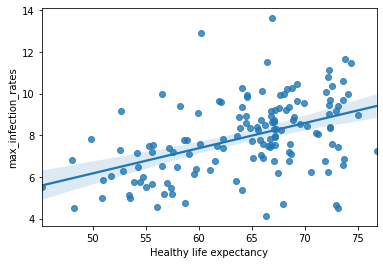

In [ ]:
x = data_join["Healthy life expectancy"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))

Sebaran `Freedom to make life choices` dan `max infection_rates`


```
x = data_join["Freedom to make life choices"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))
```
Dan
Sebaran `Freedom to make life choices` dan `max infection_rates` dengan **regplot**

```
x = data_join["Freedom to make life choices"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))
```


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


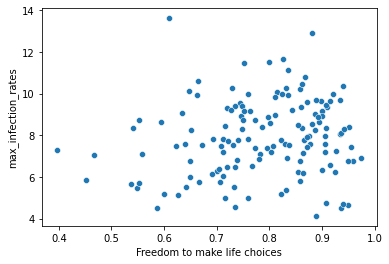

In [ ]:
x = data_join["Freedom to make life choices"]
y = data_join["max_infection_rates"]

sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


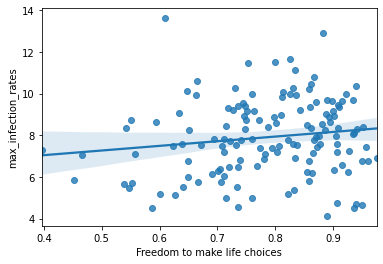

In [ ]:
x = data_join["Freedom to make life choices"]
y = data_join["max_infection_rates"]

sns.regplot(x,np.log(y))

# Penutup
Silahkan teman-teman dapat membaca di link-link dalam materi yang telah disematkan diatas dan tambahan referensi berikut ini
1. https://medium.com/machine-learning-id/simple-linear-regression-python-e541ed030e40
2. https://medium.com/purwadhikaconnect/mengenal-time-series-dan-struktur-yang-membentuknya-2e74252178c2
3. https://www.kaggle.com/mathurinache/world-happiness-report
4. https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Terima kasih.

In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
## Membaca data dari setiap kasus
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [ ]:
ConfirmedCases_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133


In [ ]:
ConfirmedCases_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/24/21', '4/25/21', '4/26/21', '4/27/21', '4/28/21', '4/29/21',
       '4/30/21', '5/1/21', '5/2/21', '5/3/21'],
      dtype='object', length=468)

In [ ]:
dates = ConfirmedCases_raw.columns[4:]

ConfirmedCases_long = ConfirmedCases_raw.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=dates,
    var_name='Date',
    value_name='Kasus Terkonfirmasi'
)
Deaths_long = Deaths_raw.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=dates,
    var_name='Date',
    value_name='Kasus Kematian'
)
Recoveries_long = Recoveries_raw.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=dates,
    var_name='Date',
    value_name='Kasus yang Sembuh'
)

In [ ]:
ConfirmedCases_long

,Province/State,Country/Region,Lat,Long,Date,Kasus Terkonfirmasi
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
128695,NaN,Vietnam,14.058324,108.277199,5/3/21,2985
128696,NaN,West Bank and Gaza,31.952200,35.233200,5/3/21,298203
128697,NaN,Yemen,15.552727,48.516388,5/3/21,6363
128698,NaN,Zambia,-13.133897,27.849332,5/3/21,91722


In [ ]:
Recoveries_long = Recoveries_long[Recoveries_long['Country/Region']!='Canada']

In [ ]:
# Merging ConfirmedCases_long and Deaths_long
full_table = ConfirmedCases_long.merge(
  right=Deaths_long,
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and Recoveries_long
full_table = full_table.merge(
  right=Recoveries_long,
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [ ]:
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [ ]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Kasus Terkonfirmasi,Kasus Kematian,Kasus yang Sembuh
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
128695,NaN,Vietnam,14.058324,108.277199,2021-05-03,2985,35,2560.0
128696,NaN,West Bank and Gaza,31.952200,35.233200,2021-05-03,298203,3283,276171.0
128697,NaN,Yemen,15.552727,48.516388,2021-05-03,6363,1239,2910.0
128698,NaN,Zambia,-13.133897,27.849332,2021-05-03,91722,1253,90130.0


In [ ]:
full_table.isnull().sum()

Province/State         88452
Country/Region             0
Lat                      936
Long                     936
Date                       0
Kasus Terkonfirmasi        0
Kasus Kematian             0
Kasus yang Sembuh       9828
dtype: int64

In [ ]:
full_table['Kasus yang Sembuh'] = full_table['Kasus yang Sembuh'].fillna(0)

In [ ]:
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

In [ ]:
full_table = full_table[~(ship_rows)]

In [ ]:
# Active Case = confirmed - deaths - recovered
full_table['Kasus Aktif'] = full_table['Kasus Terkonfirmasi'] - full_table['Kasus Kematian'] - full_table['Kasus yang Sembuh']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Kasus Terkonfirmasi', 'Kasus Kematian', 'Kasus yang Sembuh', 'Kasus Aktif'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
full_grouped

,Date,Country/Region,Kasus Terkonfirmasi,Kasus Kematian,Kasus yang Sembuh,Kasus Aktif
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
88915,2021-05-03,Vietnam,2985,35,2560.0,390.0
88916,2021-05-03,West Bank and Gaza,298203,3283,276171.0,18749.0
88917,2021-05-03,Yemen,6363,1239,2910.0,2214.0
88918,2021-05-03,Zambia,91722,1253,90130.0,339.0


In [ ]:
# new cases
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Kasus Terkonfirmasi', 'Kasus Kematian', 'Kasus yang Sembuh']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Kasus Terkonfirmasi'] = np.nan
temp.loc[mask, 'Kasus Kematian'] = np.nan
temp.loc[mask, 'Kasus yang Sembuh'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'Kasus Terkonfirmasi Baru', 'Kasus Kematian Baru', 'Kasus yang Sembuh Baru']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['Kasus Terkonfirmasi Baru', 'Kasus Kematian Baru', 'Kasus yang Sembuh Baru']
full_grouped[cols] = full_grouped[cols].astype('int')
#
full_grouped['Kasus Terkonfirmasi Baru'] = full_grouped['Kasus Terkonfirmasi Baru'].apply(lambda x: 0 if x<0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

In [ ]:
import pandas as pd
import altair as alt

full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
idn = full_grouped[full_grouped['Country/Region'] == 'Indonesia']

In [ ]:
full_grouped

,Unnamed: 0,Date,Country/Region,Kasus Terkonfirmasi,Kasus Kematian,Kasus yang Sembuh,Kasus Aktif,Kasus Terkonfirmasi Baru,Kasus Kematian Baru,Kasus yang Sembuh Baru
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88915,88915,2021-05-03,Vietnam,2985,35,2560.0,390.0,23,0,11
88916,88916,2021-05-03,West Bank and Gaza,298203,3283,276171.0,18749.0,565,11,779
88917,88917,2021-05-03,Yemen,6363,1239,2910.0,2214.0,22,6,35
88918,88918,2021-05-03,Zambia,91722,1253,90130.0,339.0,29,0,48


In [ ]:
base = alt.Chart(idn).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [ ]:
red = alt.value("#f54242")
base.encode(y="Kasus Terkonfirmasi").properties(title="Total Terkonfirmasi") | base.encode(y="Kasus Kematian", color=red).properties(title="Total Terkonfirmasi")

alt.HConcatChart(...)

In [ ]:
red = alt.value("#f54242")
base.encode(y="Kasus Terkonfirmasi Baru").properties(title="Total Terkonfirmasi Baru") | base.encode(y="Kasus Kematian Baru", color=red).properties(title="Total Terkonfirmasi Baru")

alt.HConcatChart(...)

In [ ]:
import pandas as pd
import altair as alt

full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['US', 'India', 'China', 'Italy', 'Malaysia', 'Indonesia']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [ ]:
selected_countries

,Unnamed: 0,Date,Country/Region,Kasus Terkonfirmasi,Kasus Kematian,Kasus yang Sembuh,Kasus Aktif,Kasus Terkonfirmasi Baru,Kasus Kematian Baru,Kasus yang Sembuh Baru
36,36,2020-01-22,China,548,17,28.0,503.0,0,0,0
78,78,2020-01-22,India,0,0,0.0,0.0,0,0,0
79,79,2020-01-22,Indonesia,0,0,0.0,0.0,0,0,0
84,84,2020-01-22,Italy,0,0,0.0,0.0,0,0,0
105,105,2020-01-22,Malaysia,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88808,88808,2021-05-03,India,19925604,218959,16293003.0,3413642.0,87,0,278
88809,88809,2021-05-03,Indonesia,1682004,45949,1535491.0,100564.0,4730,153,4773
88814,88814,2021-05-03,Italy,4050708,121433,3505717.0,423558.0,5946,256,13038
88835,88835,2021-05-03,Malaysia,417512,1551,385208.0,30753.0,2500,18,2068


In [ ]:
pip install altair vega_datasets

In [ ]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Kasus Terkonfirmasi Baru')
    )
).properties(
    width=800,
    height=300
)

alt.Chart(...)